<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = pd.read_csv('winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# Explore the dataset

wine_csv.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [4]:
# Info on rows, columns and dtypes

wine_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
# More info on the values of each feature/column

wine_csv.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
red_wine                  2
dtype: int64

In [6]:
wine_csv.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### 2. Set Target Variable

Create a target variable for wine quality.

In [7]:
# Target Variable

wine_csv['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 3. Set Predictor Variables

In [8]:
#Identify correlations between the variables

cor = wine_csv.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


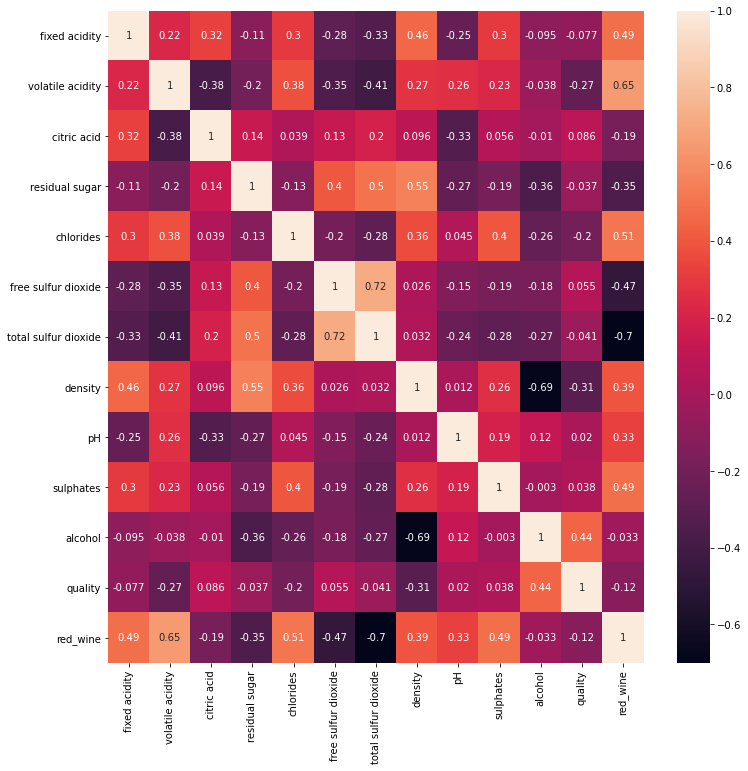

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(wine_csv.corr(), annot=True);

In [10]:
wine_csv.drop("quality", axis=1).apply(lambda x: x.corr(wine_csv.quality)) 

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
red_wine               -0.119323
dtype: float64

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

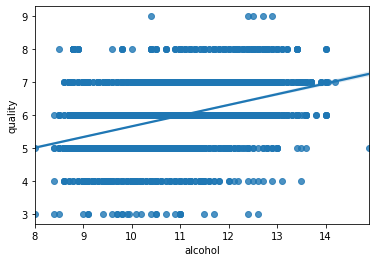

In [11]:
sns.regplot(x="alcohol", y="quality", data=wine_csv)

In [12]:
wine_csv.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

Create a predictor matrix with variables of your choice. State your reason.

### 4. Using Linear Regression Create a Model and Test Score

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = wine_csv[['residual sugar','pH', 'total sulfur dioxide', 'sulphates', 'density']]
y = wine_csv['quality']

In [14]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150)

In [15]:
# Create a model for Linear Regression

lin_model = LinearRegression(normalize=True) 

In [16]:
# Fit the model with the Training data

print("Fit the training model: ", lin_model.fit(X_train,y_train))

Fit the training model:  LinearRegression(normalize=True)


In [17]:
# Find the training score

tr_score = lin_model.score(X_train,y_train)
print("Training Score: ", tr_score)

Training Score:  0.18365623266006592


In [18]:
# Find the testing score

te_score = lin_model.score(X_test, y_test)
print("Test Score: ", te_score)

Test Score:  0.17517176880399143


In [19]:
y_pred = lin_model.predict(X_test)

In [20]:
prediction = lin_model.predict(X_train)

In [21]:
# Calculate the score (R^2 for Regression) for Training Data

from sklearn.metrics import r2_score

tr_r2 = r2_score(y_train, prediction)
print("R2 Score for Training Data: ", tr_r2)

R2 Score for Training Data:  0.18365623266006592


In [22]:
# Calculate the score (R^2 for Regression) for Testing Data

te_r2 = r2_score(y_test, y_pred)
print("R2 Score for Testing Data: ", te_r2)

R2 Score for Testing Data:  0.17517176880399143


### BONUS: Cross validation

In [23]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [24]:
print("Mean Squared Error: ")
mean_squared_error(y_test, y_pred)

Mean Squared Error: 


0.6288026578572732

In [35]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
   
    # Fit model with training set
    lin_model.fit(X.iloc[train], y.iloc[train])
    
    # Make predictions with training and test set
    train_pred = lin_model.predict(X.iloc[train])
    test_pred = lin_model.predict(X.iloc[test])
    
    # Score R2 and RMSE on training and test sets and store in list
    r2_train = r2_score(y.iloc[train], train_pred)
    r2_test = lin_model.score(X.iloc[test], y.iloc[test])

    # Create a metrics_df dataframe to display r2 and rmse scores
    rmse_train = mean_squared_error(y.iloc[train], train_pred)
    rmse_test = mean_squared_error(y.iloc[test], test_pred)
    
    train_scores.append(r2_train)
    train_rmse.append(rmse_test)
    test_scores.append(r2_test)
    test_rmse.append(rmse_test)
    
df_dict ={
    'train_score': train_scores,
    'train_rmse': train_rmse,
    'test_scores': test_scores,
    'test_rmse': test_rmse
}

df_scores = pd.DataFrame(df_dict)
df_scores

,train_score,train_rmse,test_scores,test_rmse
0,0.187084,0.651271,0.158490,0.651271
1,0.180972,0.638085,0.182484,0.638085
2,0.186082,0.608194,0.161008,0.608194
3,0.170349,0.589180,0.225006,0.589180
4,0.184576,0.641819,0.167735,0.641819


In [36]:
# Describe the metrics

df_scores.describe()

,train_score,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.181813,0.625710,0.178945,0.625710
std,0.006815,0.026016,0.027386,0.026016
min,0.170349,0.589180,0.158490,0.589180
25%,0.180972,0.608194,0.161008,0.608194
50%,0.184576,0.638085,0.167735,0.638085
75%,0.186082,0.641819,0.182484,0.641819
max,0.187084,0.651271,0.225006,0.651271


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



